# Introduction to copulas

Copulas are a powerful statistical tool commonly used in the finance sector to generate samples from a given multivariate joint distribution.
The principal advantage of using those types of function over other methods is that copulas describe the multivariate joint distribution as his margin and the dependence structure between them,
which give the user the power to fine tune his model component by component.
For example, if you have two independent variables of known distribution <code>X_1</code> and <code>X_2</code> which interact to create a dependant
variable <code>Y</code> you can set <code>X_1</code> and <code>X_2</code> as the margin of the distribution of <code>Y</code> and find the appropriate copula to simulate the interaction between the margins and fit the data.

In this post we'll assume you never used copulas and are new to the subject, so we'll see how to create a copula object and how to generate sample with the most commonly used copula.
In part 2 we'll learn how to use a copula to estimate probability of a given event.

To be able to do those exercises, you must have installed the packages <code>ggplot2</code>,<code>plot3d</code> and <code>copula</code>. Also, if you never used the copula package before, you can find the
official documentation  <a href="https://cran.r-project.org/web/packages/copula/copula.pdf">here</a>.

# Part 1

The full exercises set can be found <a href="http://www.r-exercises.com/2017/05/11/introduction-to-copulas-exercises-part-1/">here</a>.

<strong>Exercise 1</strong>
Use the <code>normalCopula()</code> function from the <code>copula</code> package to create a two dimensional Gaussian copula with a parameter of 0.9. Then create another Gaussian copula of parameter 0.2 and
look at the structure of both copulas.


In [5]:
#install.packages("VineCopula", repos="http://cran.utstat.utoronto.ca/")

In [6]:
library(copula)
normal_0.9 <- normalCopula(param = 0.9, dim = 2)
str(normal_0.9)

normal_0.2 <- normalCopula(param = 0.2, dim = 2)
str(normal_0.9)


Warning message:
"package 'copula' was built under R version 3.3.3"

Formal class 'normalCopula' [package "copula"] with 8 slots
  ..@ dispstr     : chr "ex"
  ..@ getRho      :function (obj)  
  ..@ dimension   : int 2
  ..@ parameters  : num 0.9
  ..@ param.names : chr "rho.1"
  ..@ param.lowbnd: num -1
  ..@ param.upbnd : num 1
  ..@ fullname    : chr "<deprecated slot>"
Formal class 'normalCopula' [package "copula"] with 8 slots
  ..@ dispstr     : chr "ex"
  ..@ getRho      :function (obj)  
  ..@ dimension   : int 2
  ..@ parameters  : num 0.9
  ..@ param.names : chr "rho.1"
  ..@ param.lowbnd: num -1
  ..@ param.upbnd : num 1
  ..@ fullname    : chr "<deprecated slot>"


<strong>Exercise 2</strong>
Use the <code>rCopula()</code> function to generate two samples of 500 points which distribution is the copulas from exercise 1.

In [7]:
norm_0.9<-rCopula(500, normal_0.9)
norm_0.2<-rCopula(500, normal_0.2)


<strong>Exercise 3</strong>
Make a plot of the two samples from exercise 2. Having in mind that copula determine the dependence structure of a multivariate joint distribution, by looking at those plots,
can you tell which of those two copulas you should use to simulate a distribution with a strong dependence between the margins?


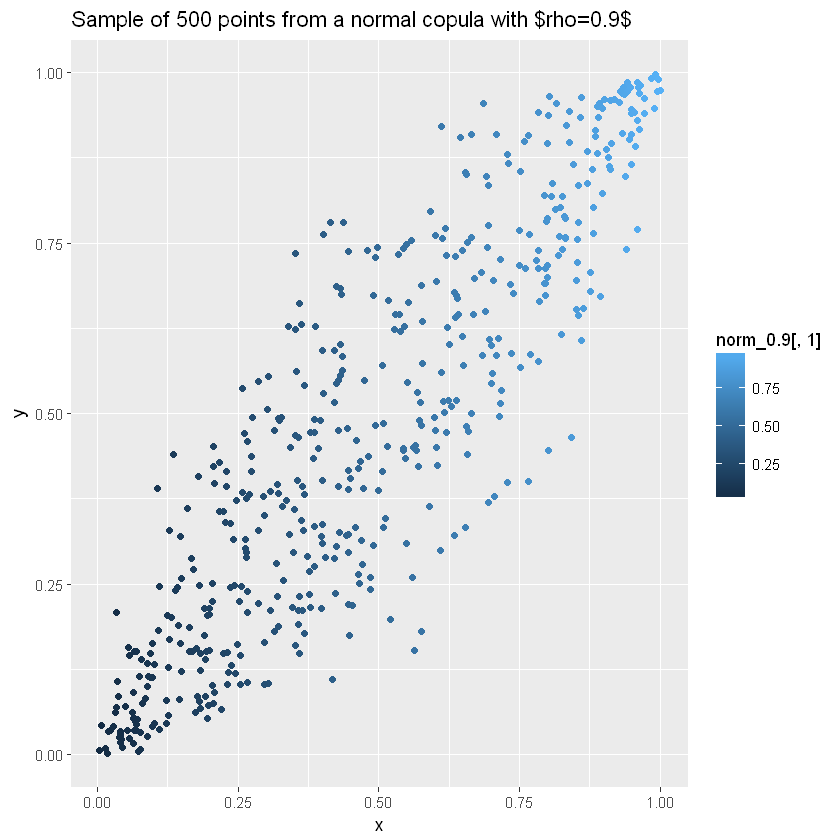

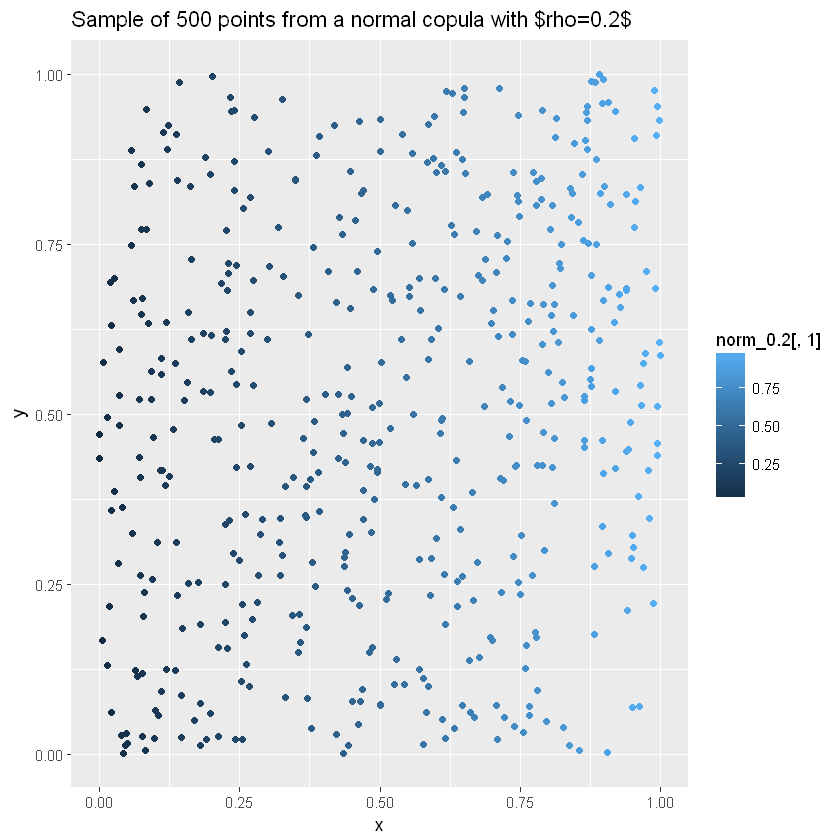

In [8]:
library(ggplot2)

plot.norm_0.9 <- qplot(norm_0.9[,1], norm_0.9[,2], colour = norm_0.9[,1], main="Sample of 500 points from a normal copula with $rho=0.9$", xlab = "x", ylab = "y")
plot.norm_0.9

plot.norm_0.2 <- qplot(norm_0.2[,1], norm_0.2[,2], colour = norm_0.2[,1], main="Sample of 500 points from a normal copula with $rho=0.2$", xlab = "x", ylab = "y")
plot.norm_0.2


<strong>Exercise 4</strong>
The <code>copula</code> package offer two other ways to visualise a copula: the function <code>persp()</code> give you the ability of doing a 3d plot of the copula and <code>contour()</code> generate a
contour plot of a copula. Use those two functions to visualise the copula from exercise 1.



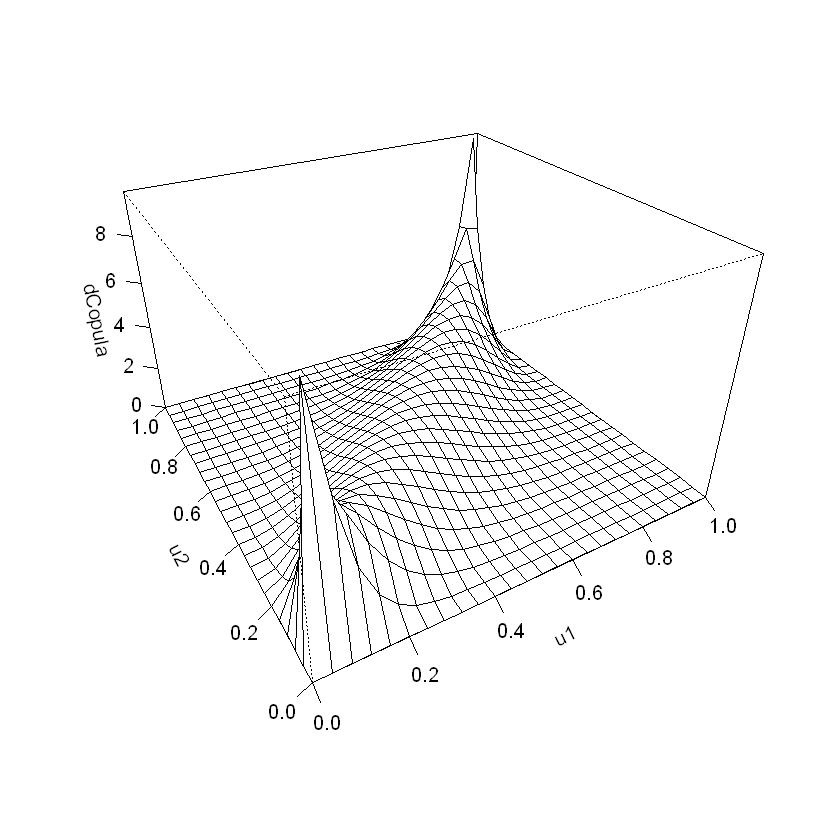

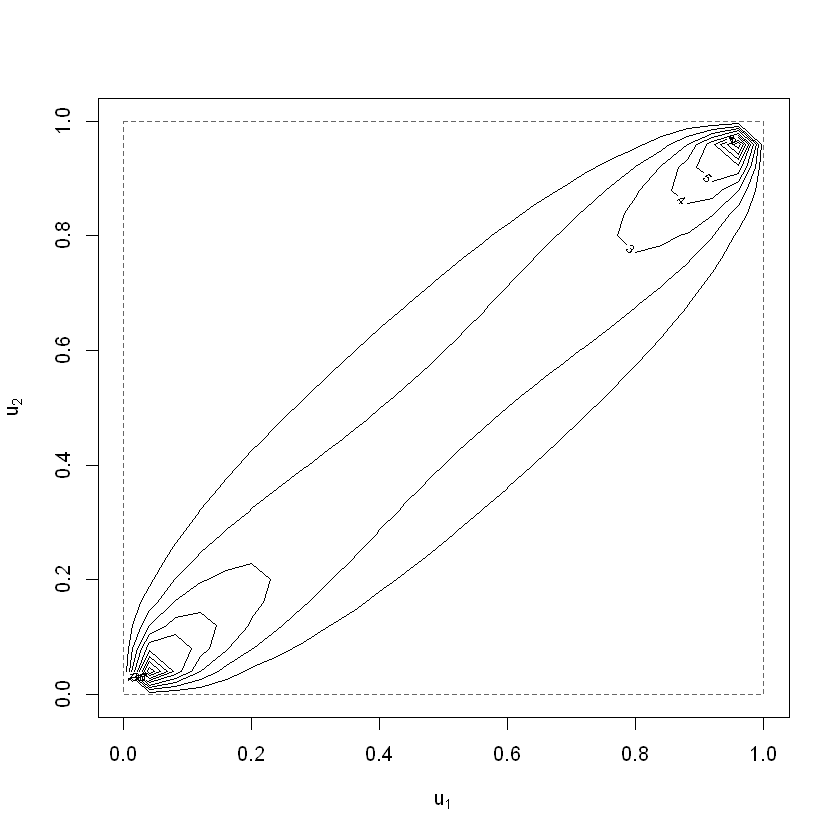

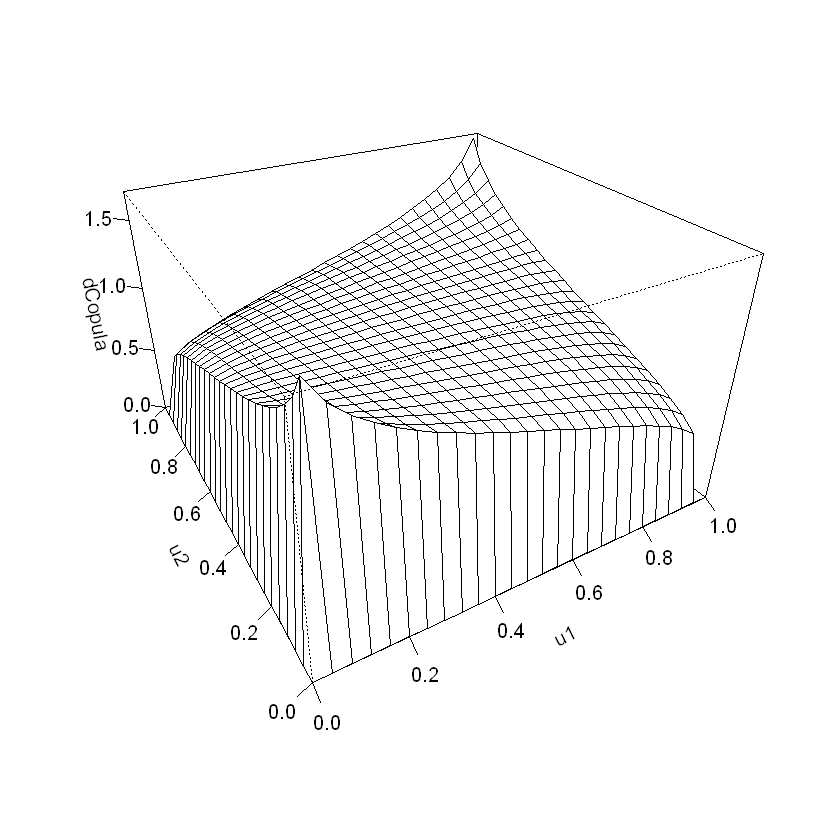

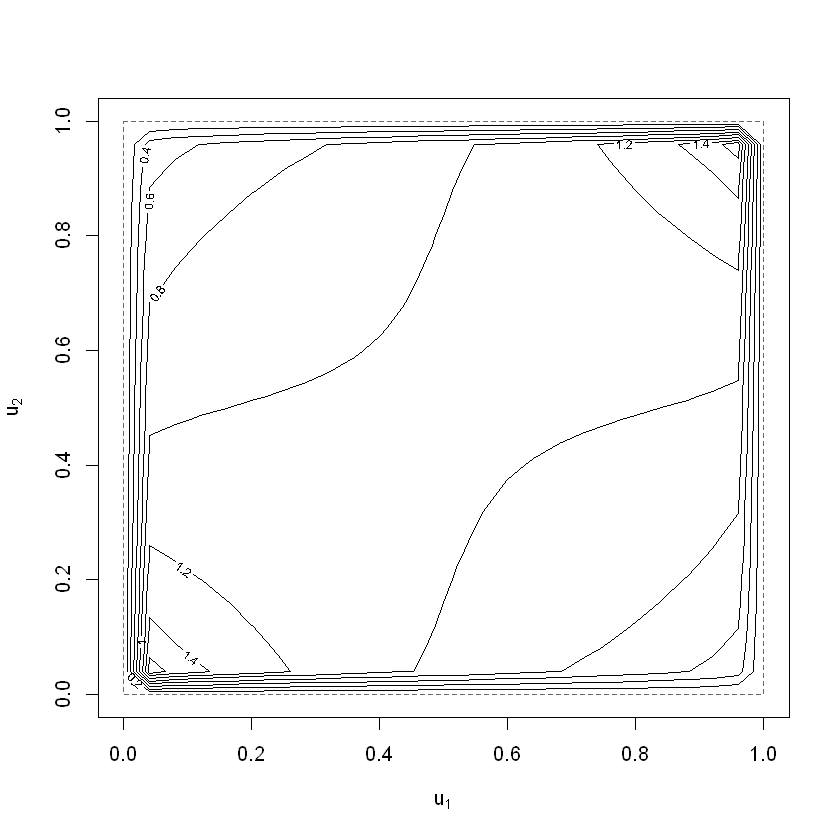

In [9]:
persp(normal_0.9,dCopula)
contour(normal_0.9,dCopula)

persp(normal_0.2,dCopula)
contour(normal_0.2,dCopula)


<strong>Exercise 5</strong>
Use the <code>mvdc()</code> function to create two multivariate joint distributions from the copula from exercise 1 with normal margins. Those margins should have a mean of 2 and 5 and a standard deviation of 3 and 1 respectively.
Then apply the <code>persp()</code> and <code>contour()</code> to visualise the two distributions. Do the margins of the two distribution change in the two plots?

Formal class 'mvdc' [package "copula"] with 4 slots
  ..@ margins         : chr [1:2] "norm" "norm"
  ..@ paramMargins    :List of 2
  .. ..$ :List of 2
  .. .. ..$ mean: num 2
  .. .. ..$ sd  : num 3
  .. ..$ :List of 2
  .. .. ..$ mean: num 5
  .. .. ..$ sd  : num 1
  ..@ marginsIdentical: logi FALSE
  ..@ copula          :Formal class 'normalCopula' [package "copula"] with 8 slots
  .. .. ..@ dispstr     : chr "ex"
  .. .. ..@ getRho      :function (obj)  
  .. .. ..@ dimension   : int 2
  .. .. ..@ parameters  : num 0.2
  .. .. ..@ param.names : chr "rho.1"
  .. .. ..@ param.lowbnd: num -1
  .. .. ..@ param.upbnd : num 1
  .. .. ..@ fullname    : chr "<deprecated slot>"


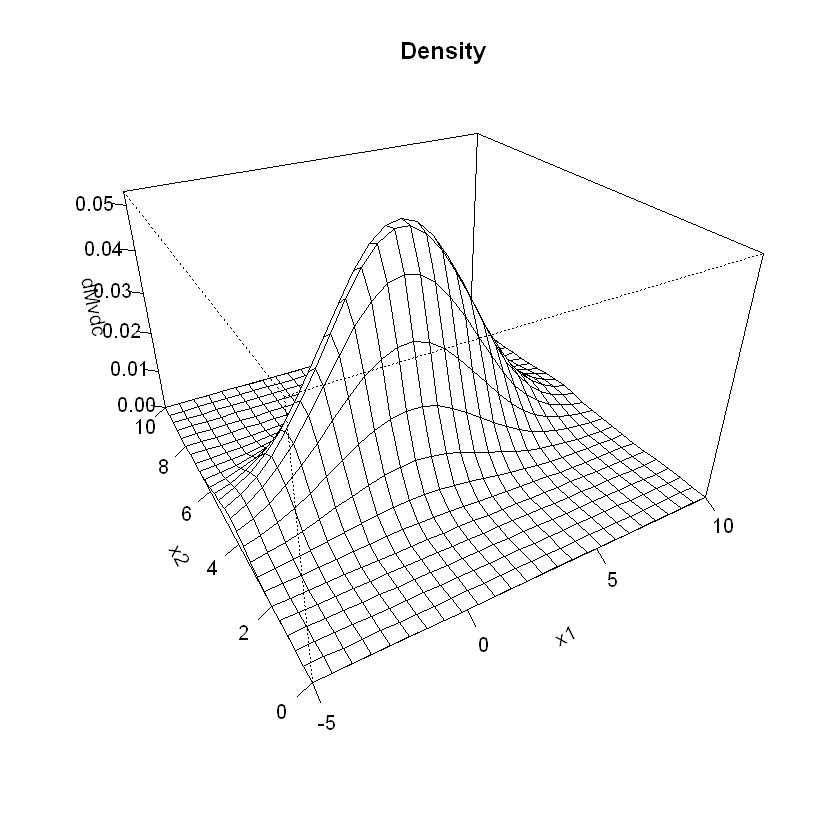

Formal class 'mvdc' [package "copula"] with 4 slots
  ..@ margins         : chr [1:2] "norm" "norm"
  ..@ paramMargins    :List of 2
  .. ..$ :List of 2
  .. .. ..$ mean: num 2
  .. .. ..$ sd  : num 3
  .. ..$ :List of 2
  .. .. ..$ mean: num 5
  .. .. ..$ sd  : num 1
  ..@ marginsIdentical: logi FALSE
  ..@ copula          :Formal class 'normalCopula' [package "copula"] with 8 slots
  .. .. ..@ dispstr     : chr "ex"
  .. .. ..@ getRho      :function (obj)  
  .. .. ..@ dimension   : int 2
  .. .. ..@ parameters  : num 0.9
  .. .. ..@ param.names : chr "rho.1"
  .. .. ..@ param.lowbnd: num -1
  .. .. ..@ param.upbnd : num 1
  .. .. ..@ fullname    : chr "<deprecated slot>"


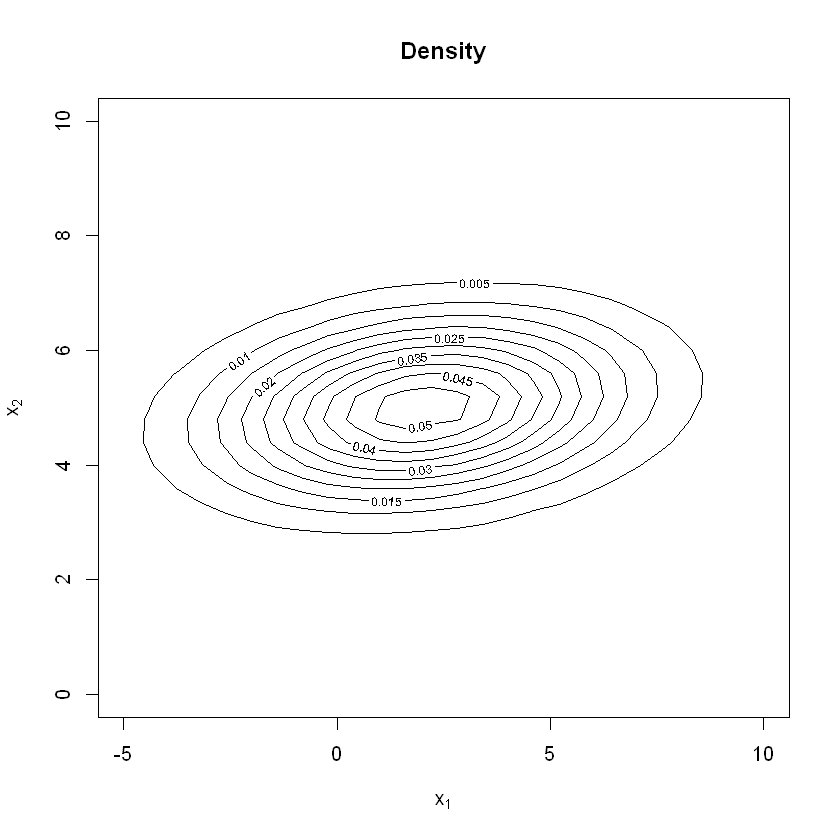

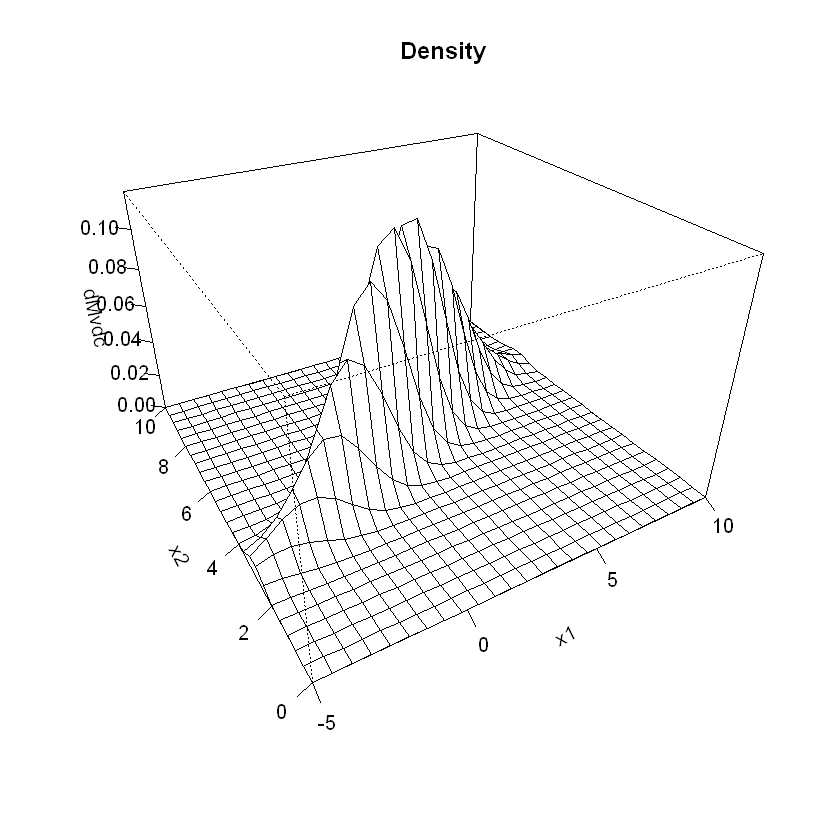

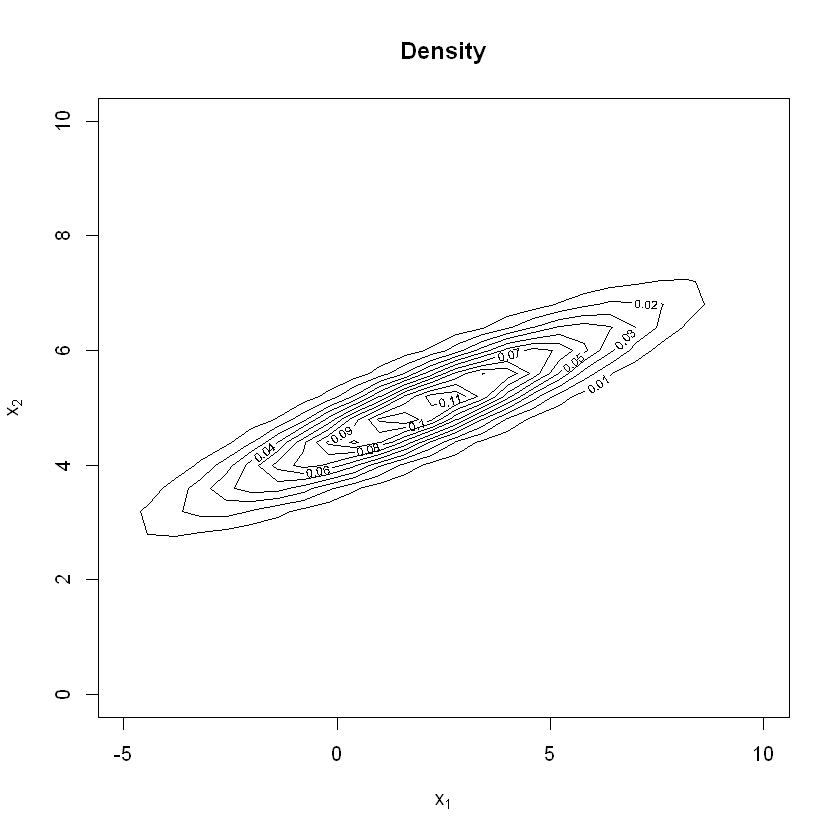

In [10]:
norm_dist <- mvdc(copula = normal_0.2, margins = c("norm", "norm"), paramMargins = list(list(mean = 2, sd=3),list(mean = 5, sd=1)) )
str(norm_dist)
persp(norm_dist,dMvdc, xlim = c(-5,10), ylim=c(0, 10), main ="Density")
contour(norm_dist,dMvdc, xlim = c(-5,10), ylim=c(0, 10), main ="Density")

norm_dist <- mvdc(copula = normal_0.9, margins = c("norm", "norm"), paramMargins = list(list(mean = 2, sd=3),list(mean = 5, sd=1)) )
str(norm_dist)
persp(norm_dist,dMvdc, xlim = c(-5,10), ylim=c(0, 10), main ="Density")
contour(norm_dist,dMvdc, xlim = c(-5,10), ylim=c(0, 10), main ="Density")

# Part 2

In the <a href="http://www.r-exercises.com/2017/05/10/introduction-to-copulas-exercises-part-1/">previous post</a> we've seen how to create a copula object and how to generate sample with the most commonly used copula.
In this post we'll learn how to use choose a copula that fit your data and how to make a rough estimate of the probability of a given event.

To be able to do those exercises, you must have installed the packages <code>ggplot2</code>,<code>fitdistrplus</code>, <code>VineCopula</code> and <code>copula</code>. Also, you can find the dataset we'll use
for this set of exercises <a href="https://www.kaggle.com/gtouzin/samplestocksreturn">here</a>. It's a clean dataset of the daily return of the Apple and Microsoft from May 2000 to May 2017.

The full exercises set can be found <a href="http://www.r-exercises.com/2017/05/17/introduction-to-copulas-exercises-part-2/">here</a>.

<strong>Exercise 1</strong>
We'll start by fitting the margin. First, do a histogram of both Apple and Microsoft returns to see the shape of both distributions.


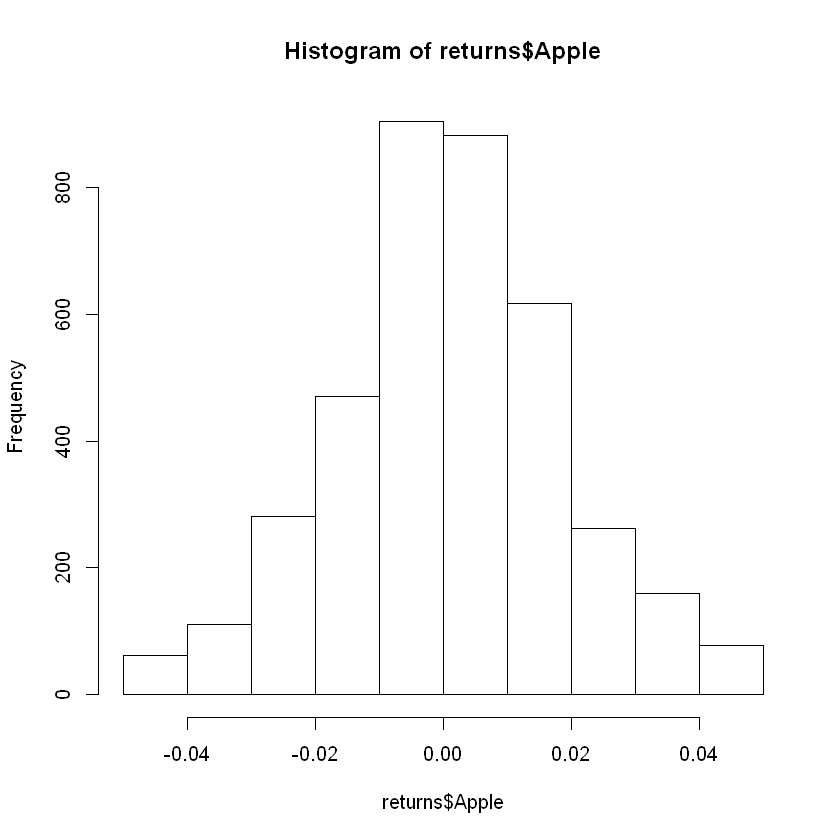

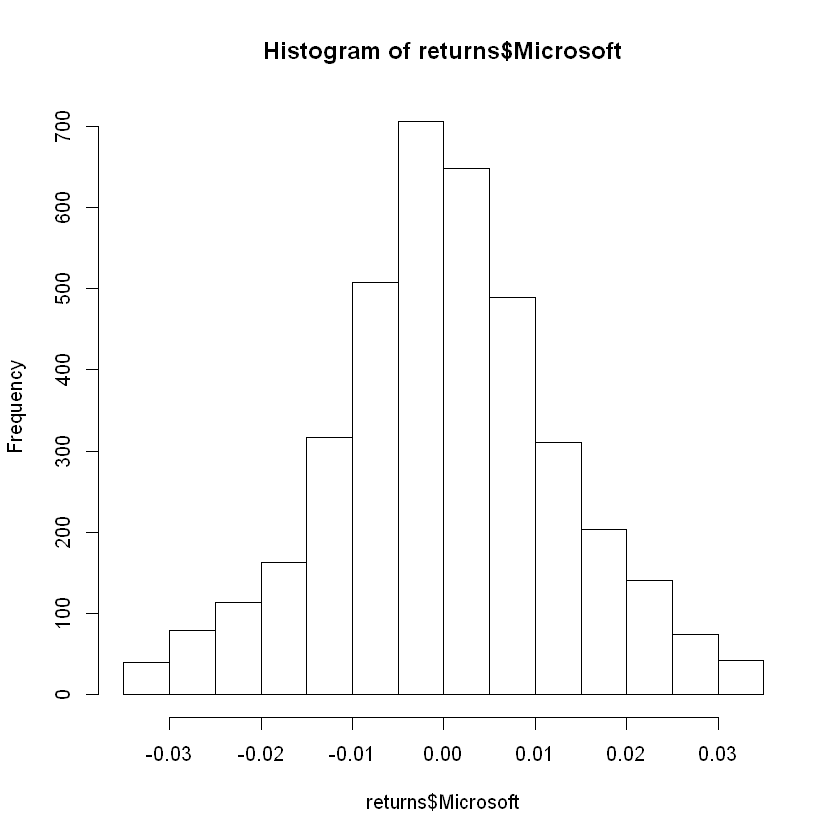

In [21]:
returns<-read.csv(file="returns_00_17.csv",header=TRUE)
hist(returns$Apple)
hist(returns$Microsoft)

<strong>Exercise 2</strong>
Both distributions seems symmetric and have a domain which contain positive and negative values.
Knowing those facts, use the <code>fitdist()</code> function to see how the normal, logistic and Cauchy distribution fit the Apple returns dataset.
Which of those three distributions is best suited to simulate the Apple return dataset and what are the parameter of this distribution?

Warning message:
"package 'fitdistrplus' was built under R version 3.3.3"Loading required package: MASS
Loading required package: survival


[1] -19973.54

mean 
0.00113756

sd 
0.01785252

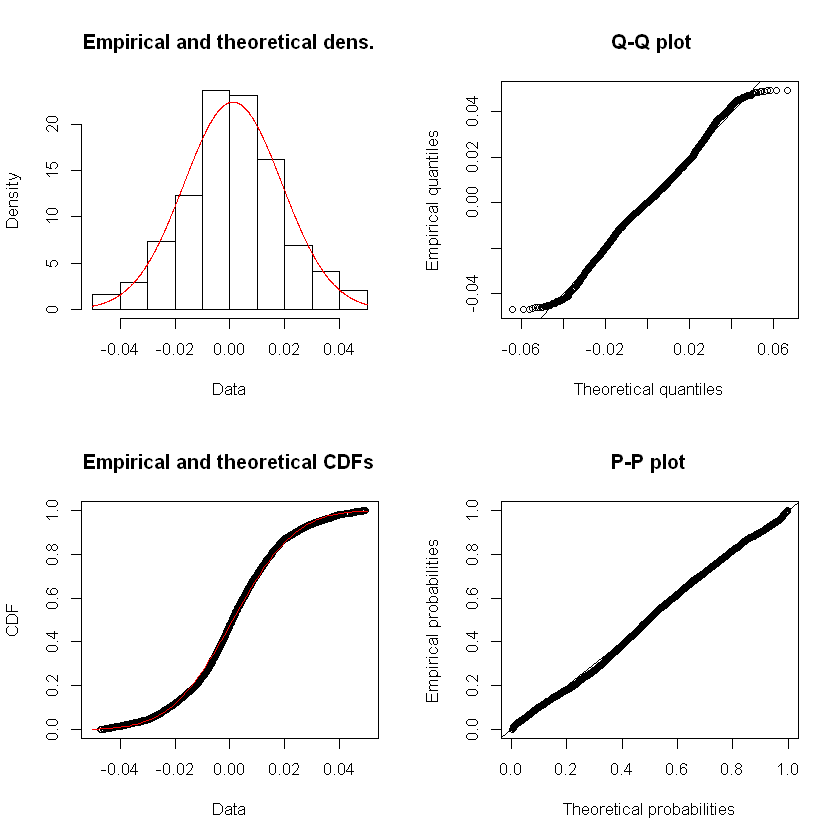

[1] -19970.34

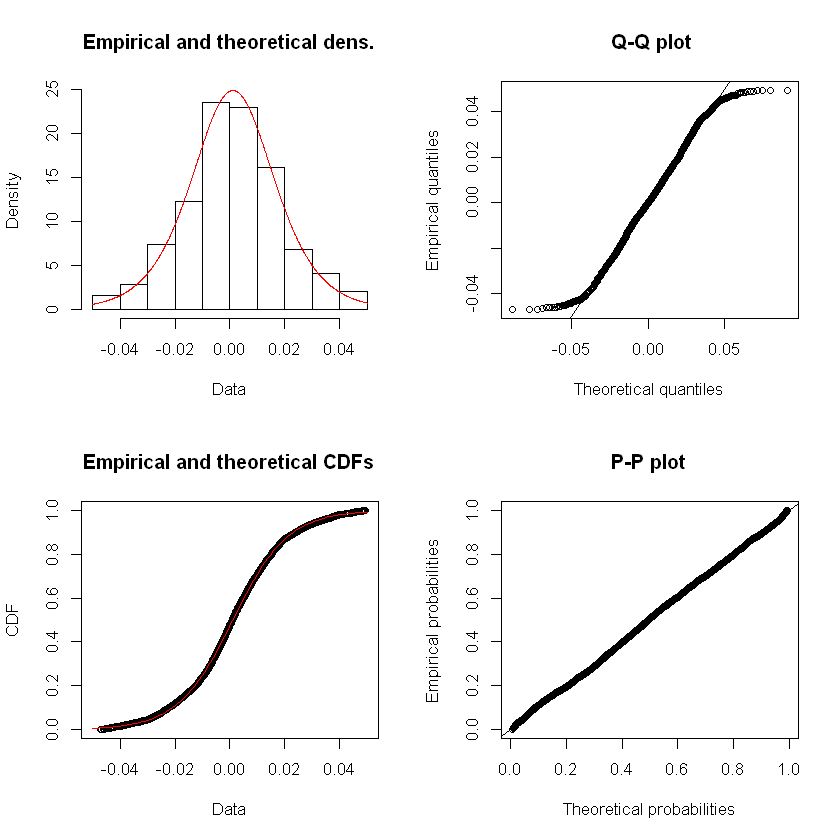

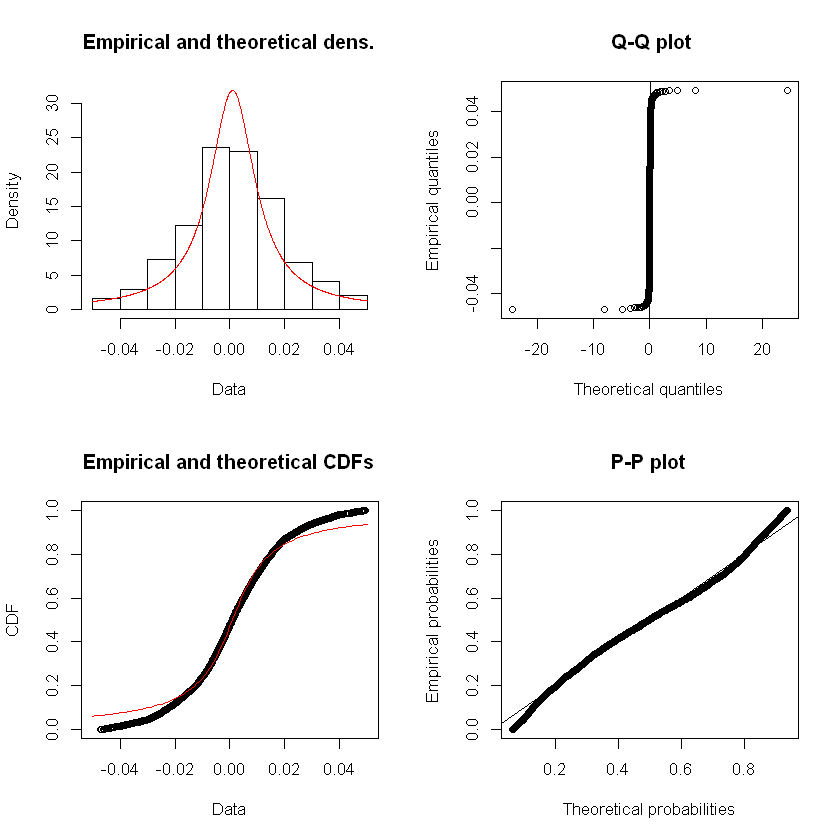

In [22]:
library(fitdistrplus)

apple.norm <- fitdist(returns$Apple, "norm")
plotdist(returns$Apple,"norm",para=list(mean=apple.norm$estimate[1],sd=apple.norm$estimate[2]))
apple.norm$aic
apple.norm$estimate[1]
apple.norm$estimate[2]

apple.log <- fitdist(returns$Apple,"logis")
plotdist(returns$Apple,"logis",para=list(location=apple.log$estimate[1],scale=apple.log$estimate[2]))
apple.log$aic

apple.cauchy <- fitdist(returns$Apple,"cauchy")
plotdist(returns$Apple,"cauchy",para=list(location=apple.cauchy$estimate[1],scale=apple.cauchy$estimate[2]))

<strong>Exercise 3</strong>
Repeat exercise 2 with the Microsoft return.

[1] -22697.15

mean 
0.0002408549

sd 
0.01251298

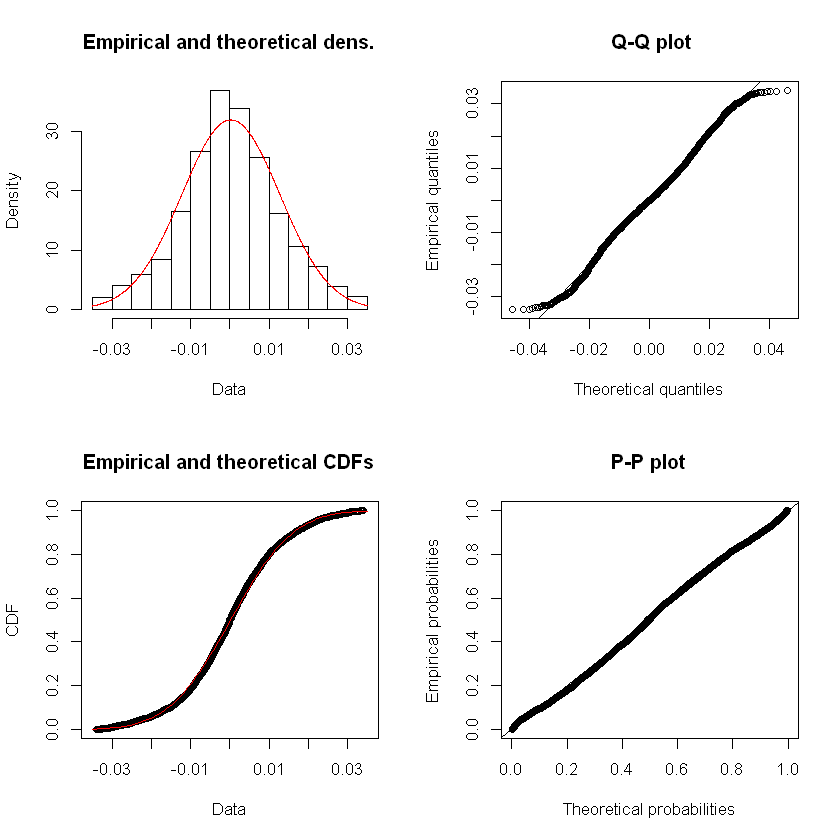

[1] -22687.25

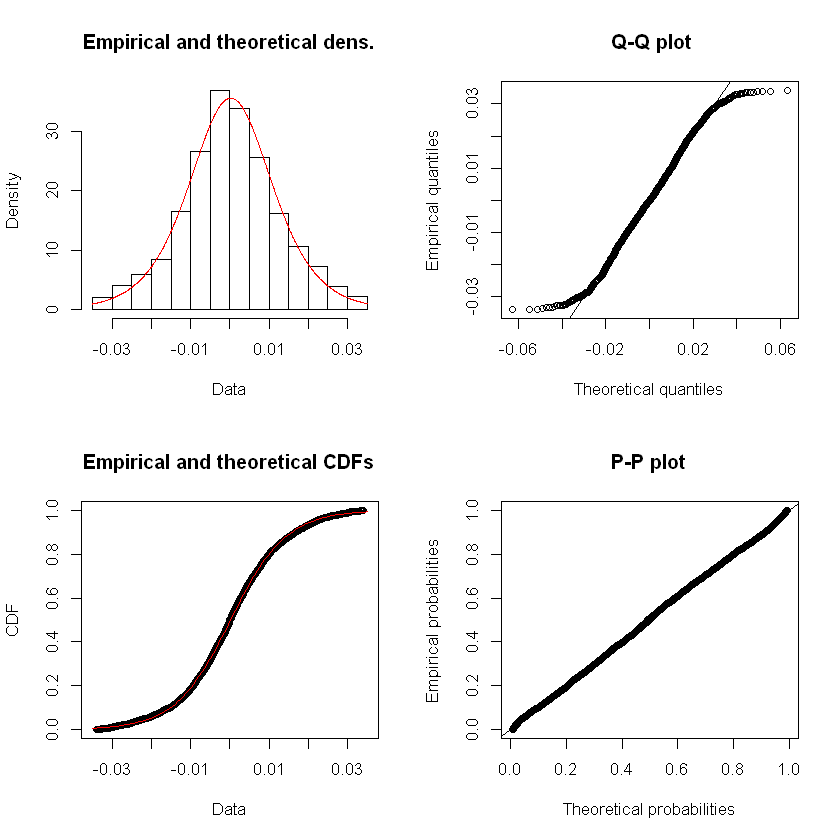

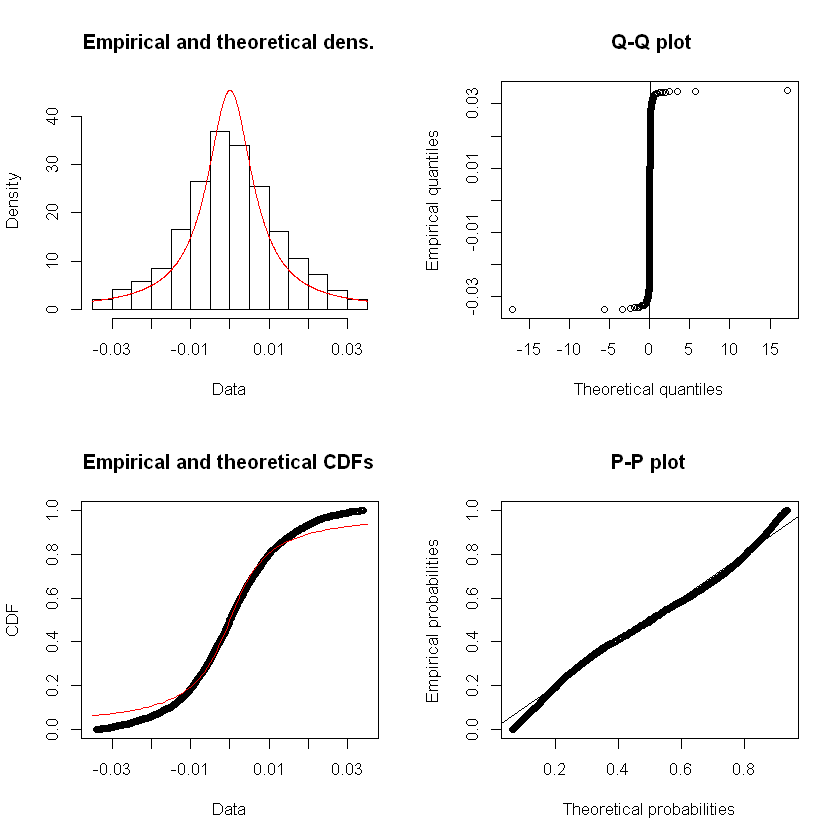

In [23]:
msft.norm <- fitdist(returns$Microsoft, "norm")
plotdist(returns$Microsoft,"norm",para=list(mean=msft.norm$estimate[1],sd=msft.norm$estimate[2]))
msft.norm$aic
msft.norm$estimate[1]
msft.norm$estimate[2]

msft.log <- fitdist(returns$Microsoft,"logis")
plotdist(returns$Microsoft,"logis",para=list(location=msft.log$estimate[1],scale=msft.log$estimate[2]))
msft.log$aic

msft.cauchy <- fitdist(returns$Microsoft,"cauchy")
plotdist(returns$Microsoft,"cauchy",para=list(location=msft.cauchy$estimate[1],scale=msft.cauchy$estimate[2]))

<strong>Exercise 4</strong>
Plot the joint distribution of the Apple and Microsoft daily returns. Add the regression line to the plot and compute the correlation of both variables.

[1] 0.3786614

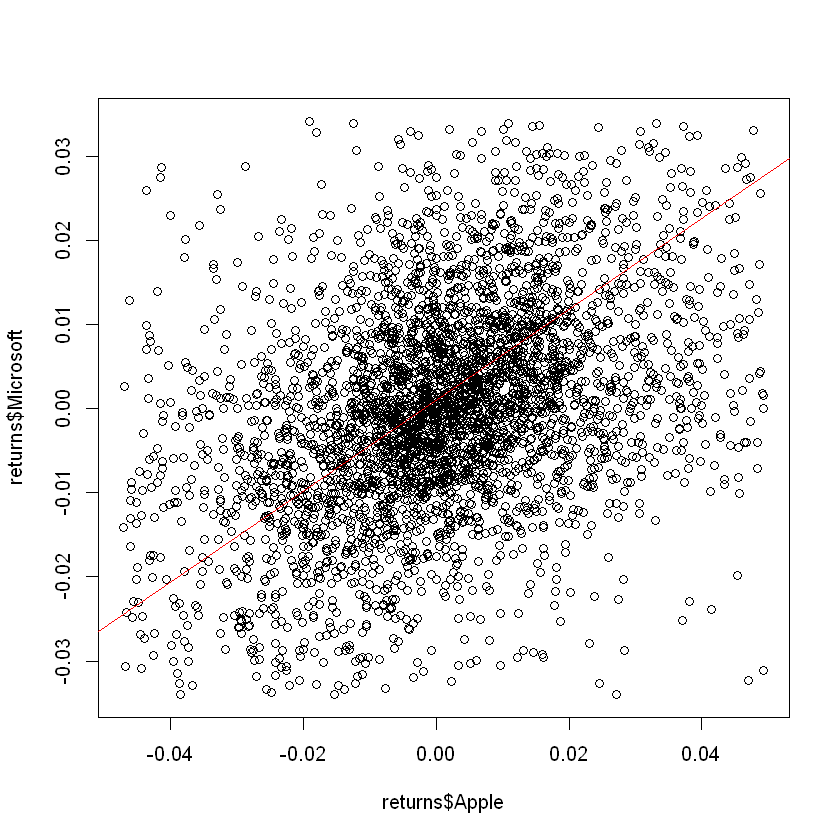

In [24]:
plot(returns$Apple,returns$Microsoft)
abline(lm(returns$Apple~returns$Microsoft),col="red")
cor(returns$Apple,returns$Microsoft)

<strong>Exercise 5</strong>
Use the <code>pobs()</code> from the <code>VineCopula()</code> package to compute the pseudo-observations for both returns values, then use the <code>BiCopSelect()</code> function to select the copula
which minimise the AIC on the dataset. Which copula is selected and what are his parameters.

In [25]:
library(VineCopula)

x.1 <- pobs(as.matrix(returns[,2:3]))[,1]
x.2 <- pobs(as.matrix(returns[,2:3]))[,2]
apriori.copula <- BiCopSelect(x.1,x.2,familyset=NA)
apriori.copula


Warning message:
"package 'VineCopula' was built under R version 3.3.3"

Bivariate copula: Survival BB8 (par = 2.55, par2 = 0.77, tau = 0.27) 